In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
X = iris.data[:,2:]
y = iris.target

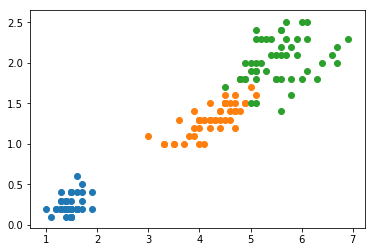

In [10]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")

In [19]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [21]:
plot_decision_boundary(dt,axis=[0.7,7.1,0,2.6])

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


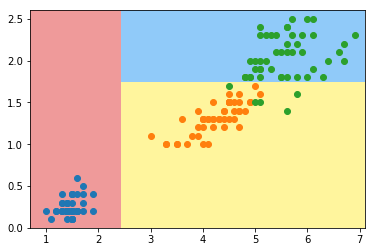

In [22]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

### 手动实现上述功能

In [23]:
def split(X,y,d,v):
    #X y 为样本  d为在某个维度上划分  v为划分的值
    index_a = (X[:,d]<=v)
    index_b = (X[:,d]>v)
    # 返回划分后的样本
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [30]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v

In [32]:
best_entropy, best_d, best_v = try_split(X, y)

In [33]:
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.46209812037329684
best_d = 0
best_v = 2.45


In [34]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [35]:
entropy(y1_l)

0.0

In [36]:
entropy(y1_r)

0.6931471805599453

In [37]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy =", best_entropy2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_entropy = 0.2147644654371359
best_d = 1
best_v = 1.75


In [38]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [39]:
entropy(y2_l)

0.30849545083110386

In [40]:
entropy(y2_r)

0.10473243910508653

### 使用 SVM算法进行分类 复习

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel="rbf",gamma=1)

In [43]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


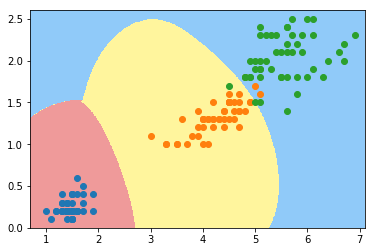

In [44]:
plot_decision_boundary(svc,axis=[0.7,7.1,0,2.6])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()